Create a stronger link between one observation and the associated ensemble members

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from pathlib import Path

In [2]:
### Work within one logs/ directory
data_dir = Path('/projects/wakedynamics/orybchuk/ldm-3d/logs/2023-10-14T00-33-45_split-rank-geo-raaw-kl1_0300/images/test')
out_dir = Path(data_dir, 'postprocessed')
out_dir.mkdir(exist_ok=True)

In [3]:
### Helper parameters
n_files_per_sim = len(list(data_dir.glob('inputs*.npy')))
n_ens_per_obs = 10
n_batch = 2
n_files_per_obs = int(n_ens_per_obs/n_batch)
assert n_ens_per_obs%n_batch==0

### Ground truth data

In [4]:
### Deal with the ground truth, input files
file_iter = 0
for i in range(0, n_files_per_sim, n_files_per_obs):
    input_data = np.load(Path(data_dir, f'inputs_gs-000000_e-000000_b-{str(i).zfill(6)}.npy'))[0,:,:,:,:]
    np.save(Path(out_dir, f'input_{str(file_iter).zfill(4)}.npy'), input_data)
    
    cond_data = np.load(Path(data_dir, f'conditioning_gs-000000_e-000000_b-{str(i).zfill(6)}.npy'))[0,:,:,:,:]
    np.save(Path(out_dir, f'conditioning_{str(file_iter).zfill(4)}.npy'), cond_data)
    
    file_iter += 1

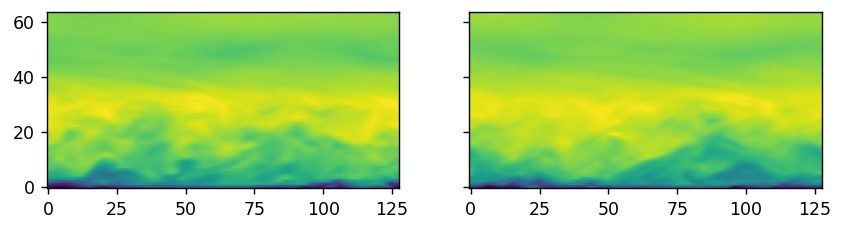

In [5]:
### Check that input files are distinct
fig, ax = plt.subplots(1, 2, figsize=(8,4), sharex=True, sharey=True, dpi=125)

check1 = np.load(Path(out_dir, 'input_0000.npy'))
check2 = np.load(Path(out_dir, 'input_0001.npy'))

ax1 = ax[0].imshow(check1[0,:,64,:].T,
                  origin='lower')
ax1 = ax[1].imshow(check2[0,:,64,:].T,
                  origin='lower')

plt.show()

### Ensemble members

In [6]:
### Deal with the ground truth, input files
obs_iter = 0
file_iter = 0
for i in range(0, n_files_per_sim, n_files_per_obs):  # Iterate over observations
    ens_num = 0
    for j in range(n_files_per_obs):
        ens_data = np.load(Path(data_dir, f'samples_gs-000000_e-000000_b-{str(file_iter).zfill(6)}.npy'))
        
        for batchnum in range(n_batch):
            np.save(Path(out_dir, f'ens_{str(obs_iter).zfill(4)}_{str(ens_num).zfill(4)}.npy'), ens_data[batchnum,:,:,:,:])
            ens_num += 1
        file_iter += 1

    obs_iter += 1

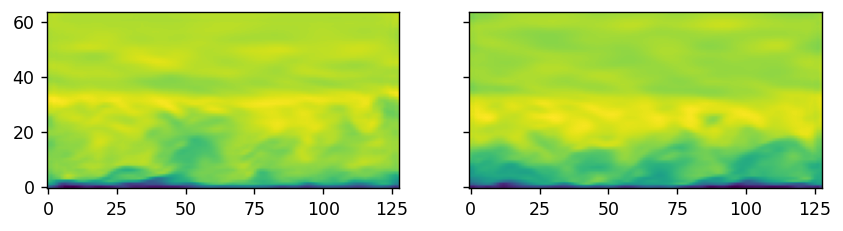

In [7]:
### Check that ensemble files are distinct
fig, ax = plt.subplots(1, 2, figsize=(8,4), sharex=True, sharey=True, dpi=125)

check1 = np.load(Path(out_dir, 'ens_0000_0000.npy'))
check2 = np.load(Path(out_dir, 'ens_0001_0000.npy'))

ax1 = ax[0].imshow(check1[0,:,64,:].T,
                  origin='lower')
ax1 = ax[1].imshow(check2[0,:,64,:].T,
                  origin='lower')

plt.show()

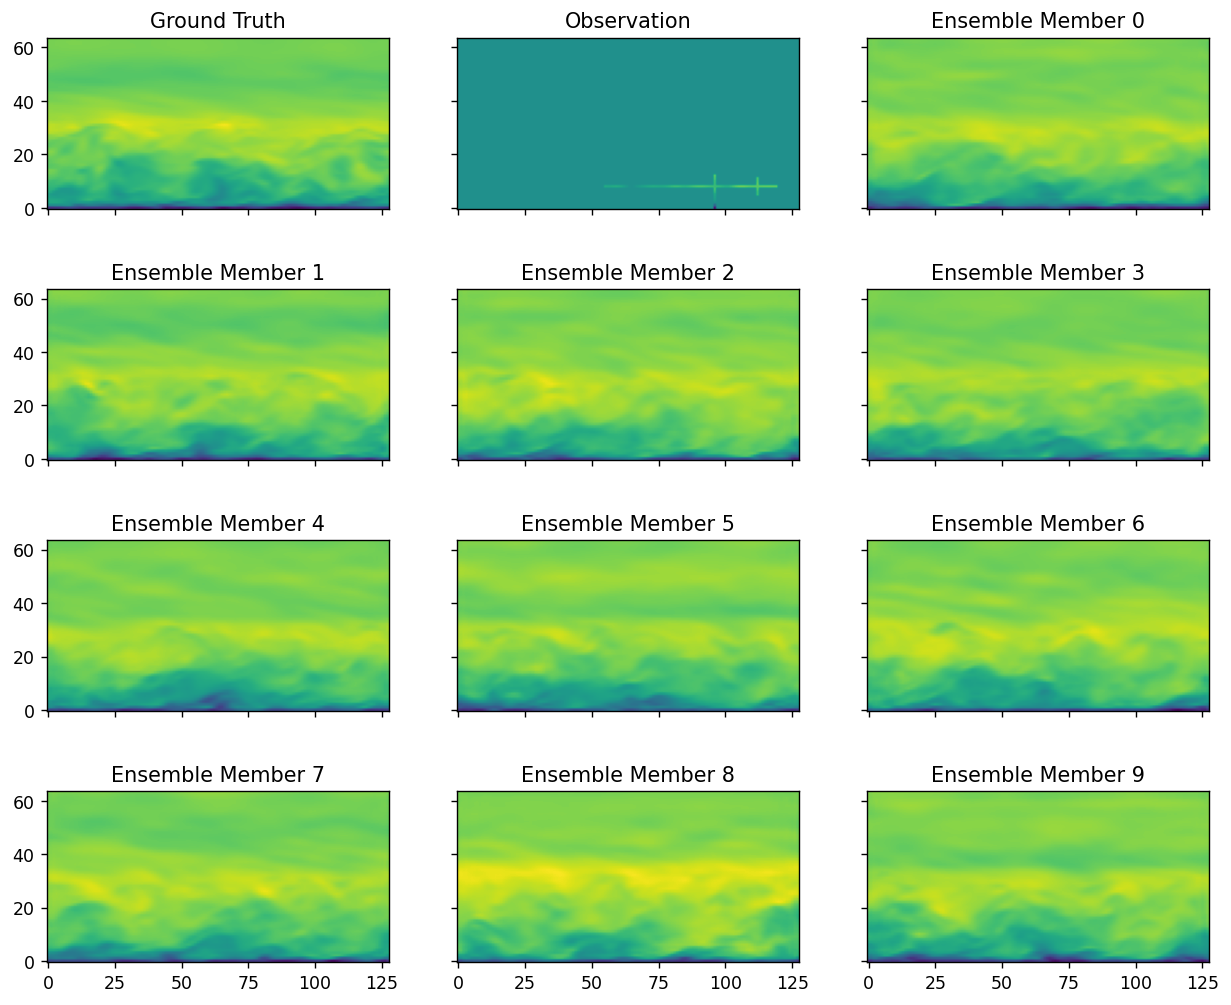

In [8]:
### Check if ensemble members sort of match the observation
fig, ax = plt.subplots(4, 3, figsize=(12,10), sharex=True, sharey=True, dpi=125)

obs_num = 6
gt1 = np.load(Path(out_dir, f'input_{str(obs_num).zfill(4)}.npy'))
obs1 = np.load(Path(out_dir, f'conditioning_{str(obs_num).zfill(4)}.npy'))

ax1 = ax[0,0].imshow(gt1[0,:,64,:].T,
                  origin='lower',
                  vmin=-0.8,
                  vmax=0.8)
ax1 = ax[0,1].imshow(obs1[0,:,64,:].T,
                  origin='lower',
                  vmin=-0.8,
                  vmax=0.8)
ax[0,0].set_title("Ground Truth")
ax[0,1].set_title("Observation")

for i, axs in enumerate(ax.flatten()[2:]):
    ens = np.load(Path(out_dir, f'ens_{str(obs_num).zfill(4)}_{str(i).zfill(4)}.npy'))
    axs.imshow(ens[0,:,64,:].T,
                  origin='lower',
                  vmin=-0.8,
                  vmax=0.8)
    axs.set_title("Ensemble Member "+str(i))


plt.show()

In [9]:
# i_assess = 120
# j_assess = 64
# k_assess = 8
# obs1[0,i_assess,j_assess,k_assess]